# Stock market price prediction using XGBRegressor Algorithm 

## Step 1:- Data Collection

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Loding Dataset

In [2]:
stock=pd.read_csv(r"TATAMOTORS.NS.csv")

In [3]:
stock.head() #this data set has 7 features 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0
3,2006-12-06,167.121048,170.167969,165.568832,168.912796,147.927109,4822862.0
4,2006-12-07,168.634933,171.701019,167.322250,171.068634,149.815109,3963218.0


In [4]:
stock.shape # the original dataset has 4225 rows and 7 columns

(4233, 7)

In [5]:
stock.info() # Now we can see that Date column is object it means sting 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4233 entries, 0 to 4232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4233 non-null   object 
 1   Open       4226 non-null   float64
 2   High       4226 non-null   float64
 3   Low        4226 non-null   float64
 4   Close      4226 non-null   float64
 5   Adj Close  4226 non-null   float64
 6   Volume     4226 non-null   float64
dtypes: float64(6), object(1)
memory usage: 231.6+ KB


In [6]:
stock.tail(3)


,Date,Open,High,Low,Close,Adj Close,Volume
4230,2024-01-17,811.000000,813.700012,804.0,805.549988,805.549988,7895439.0
4231,2024-01-18,807.000000,822.950012,797.0,819.049988,819.049988,11500495.0
4232,2024-01-19,823.849976,826.000000,819.5,823.549988,823.549988,5706888.0


## Step 2:- Exploratory Data Analusis 

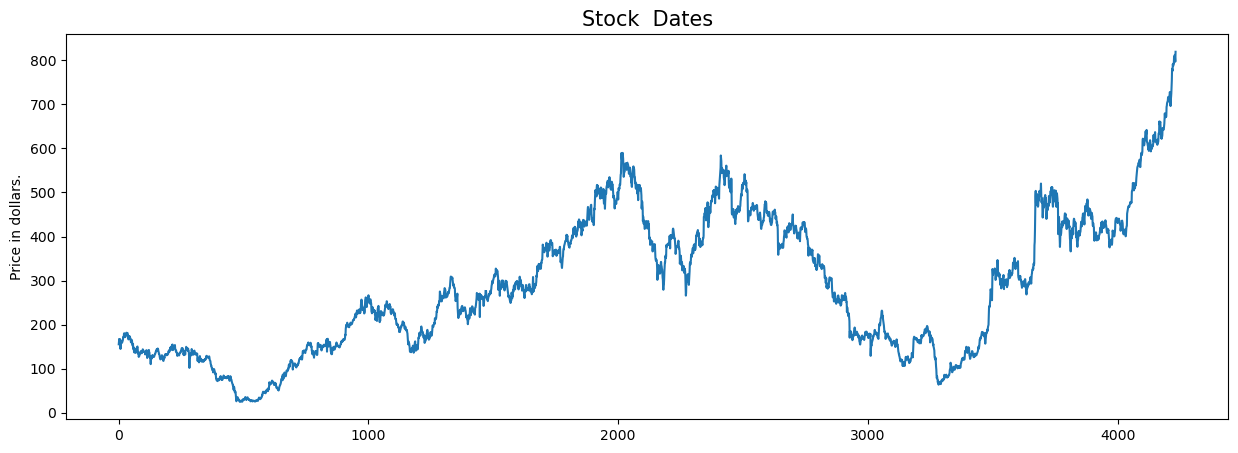

In [7]:
plt.figure(figsize=(15,5))
plt.plot(stock['Low'])
plt.title('Stock  Dates', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(-1000.0, 0, '2020-01-10'),
  Text(0.0, 0, '2006-12-01'),
  Text(1000.0, 0, '2010-12-22'),
  Text(2000.0, 0, '2015-01-07'),
  Text(3000.0, 0, '2019-01-24'),
  Text(4000.0, 0, '2023-02-09'),
  Text(5000.0, 0, '')])

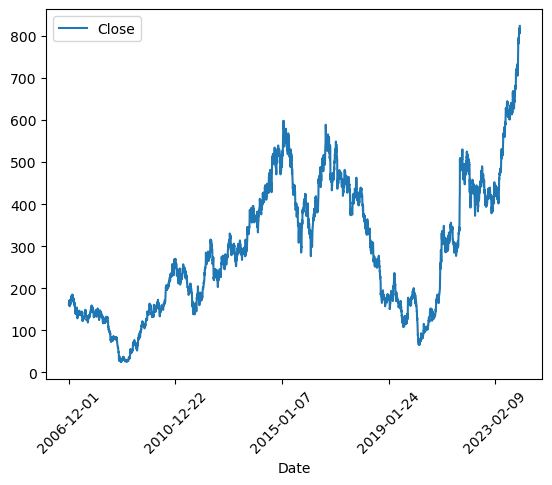

In [8]:
stock.plot(x="Date", y="Close")# this plot shows the closing price of 2000 to 2020 year
plt.xticks(rotation=45)

## Step 3:- Data preprocessing

### :- Data Cleaning & Headling with missing values

In [9]:
stock.isnull().sum().sum()#On this dataset has total 42 missing values have

42

In [10]:
stock.isna().sum()# expact Data columns all the Column have 7 missing values

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [11]:
stock.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0


In [12]:
stock['Volume'].median() # I volume median value is 10674193.0,so we fill the nan value 

10693392.5

In [13]:
stock['Volume'].replace(np.nan,10693392.5,inplace=True)

In [14]:
stock['Volume'].isnull().sum()# Now volume column is 0 missing value

0

In [15]:
stock.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0


In [16]:
stock.dropna(inplace=True)

In [17]:
stock.isna().sum().sum()

0

* ***Now all the null values are droped now this Data set as 0 nan values***

## Step 4:- Data Integration and Reduction

In [18]:
x = stock.drop(columns=['Date', 'Open'])  # Assuming 'Date' is not a feature and 'Open' is the target variable
y = stock['Open']

## step 6:- Data Splitting

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11,shuffle=False)

In [20]:
x_train.shape,x_test.shape

((3380, 5), (846, 5))

## Step 5:-Feature Scaling

In [21]:
Scaler=StandardScaler()

In [22]:
Scaler.fit(x_train)

StandardScaler()

## Step 7:- Model Training

In [23]:
xgb=XGBRegressor()

In [24]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred = xgb.predict(x_train)

## Model Evaluation

In [26]:
from sklearn.metrics import r2_score

In [27]:
predictions = xgb.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 1705.6295461563584


In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:",r2)

Mean Squared Error: 0.9252252253784354


In [30]:
# Predicting the next day's opening price (assuming last row of dataset)
next_day_features = x.iloc[[-1]]  # Assuming the last row contains the latest features
next_day_opening_price = xgb.predict(next_day_features)
print("Predicted next day's opening price:", next_day_opening_price)


Predicted next day's opening price: [582.33105]
